In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("train.csv")
data = np.array(data)
m, n = data.shape # m: antall eksempel, n: antall egenskaper + label
np.random.shuffle(data)

dataVal = data[0:1000].T #Hver kolonne er et eksempel
valLabel = dataVal[0]
val = dataVal[1:n] 
val = val / 255.0

dataTrain = data[1000:m].T
trainLabel = dataTrain[0]
train = dataTrain[1:n] #784 rader som beskriver pikselverdien
train = train/ 255.0 
train.shape

(784, 41000)

In [ ]:
def initParams():
    W1 = np.random.rand(128, 784) - 0.5 #Inputlayer har 784 noder 128x784x784x1 = 128x1
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(10, 128) - 0.5 #Hiddenlayer1 (128 noder) og outputLayer (10 noder)
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2,

def ReLu(Z):
    return np.maximum(0, Z)

def derivReLu(Z):
    return Z > 0 #Returnerer 1 hvis Z > 0 og 0 ellers

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Stabiliserer for numeriske problemer
    return expZ / np.sum(expZ, axis=0, keepdims=True)


def forwardPropagation(W1, b1, W2, b2, inputData):
    Z1 = W1.dot(inputData) + b1
    A1 = ReLu(Z1) #Aktiveringsfunksjon inn i skjult lag

    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2) #Aktiveringsfunksjon til output, her vil A2 være sannsynlighetsfordeling over de 10 mulige sifrene

    return Z1, A1, Z2, A2

def oneHot(label): 
    oneHotLabel = np.zeros((label.size, label.max() + 1)) 
    oneHotLabel[np.arange(label.size), label] = 1 #For hver rad, gå til kolonnen spesifisert av label og sett den til 1
    oneHotLabel = oneHotLabel.T
    return oneHotLabel

# Konverter label-vektoren til en matrise (10 x m), der hver kolonne er en one-hot encoded vektor
# med 1 på indeksen som tilsvarer klasselabelen, og 0 i de andre posisjonene.

def backPropagation(Z1, A1, A2, W2, inputData, label):
    oneHotLabel = oneHot(label)
    dZ2 = A2 - oneHotLabel # (Tapsfunksjon) Feilen i output-laget (differansen mellom predikert og faktisk label)
    dW2 = 1/m * dZ2.dot(A1.T) # Gradient for W2: Hvor mye output-feilen påvirkes av aktiveringene fra skjult lag
    db2 = 1/m * np.sum(dZ2) # Gradient for b2: Summen av feilene, siden biasen er den samme for alle eksempler
    dZ1 = W2.T.dot(dZ2) * derivReLu(Z1) # Feilen i skjult lag: Backpropagerer output-feilen gjennom vektene og aktiveringsfunksjonen (ReLU) (Kjerneregelen)
    dW1 = 1/m * dZ1.dot(inputData.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def getPredictions(A2): #Returnerer indeksen til den største verdien i hver kolonne / oneHotter bikkja
    return np.argmax(A2, 0) #Returnerer indeksen til klassen som har høyest sannsynlighet for hvert eksempel

def getAccuracy(predictions, label): #Summerer opp alle den gjettet riktig og deler på antall gjett for å finne nøyaktighet
    print(predictions, label)
    return np.sum(predictions == label) / label.size

In [184]:
def gradientDescent(inputData, label, iterations, alpha): # Minimerer kostnadsfunksjonen ved å justere vektene i retning av gradientene, med steg av størrelse alpha
    W1, b1, W2, b2 = initParams()
    for i in range(iterations + 1):
        # decay_rate = np.log(alpha / 0.1) / iterations
        # alpha = alpha * np.exp(-decay_rate * i)
        if i % 100 == 0:
            alpha = alpha * 0.9
        Z1, A1, Z2, A2 = forwardPropagation(W1, b1, W2, b2, inputData)
        dW1, db1, dW2, db2 = backPropagation(Z1, A1, A2, W2, inputData, label)
        W1, b1, W2, b2 = updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print(f"Iteration: {i}")
            print(f"Accuracy: {getAccuracy(getPredictions(A2), label)}")
    return W1, b1, W2, b2

In [185]:
W1, b1, W2, b2 = gradientDescent(train, trainLabel, 500, 0.5)

Iteration: 0
[7 7 7 ... 7 7 7] [1 5 2 ... 1 1 0]
Accuracy: 0.09778048780487805
Iteration: 50
[1 5 2 ... 1 1 0] [1 5 2 ... 1 1 0]
Accuracy: 0.8286829268292683
Iteration: 100
[1 5 2 ... 1 1 0] [1 5 2 ... 1 1 0]
Accuracy: 0.8814634146341463
Iteration: 150
[1 5 2 ... 1 1 0] [1 5 2 ... 1 1 0]
Accuracy: 0.9002439024390244
Iteration: 200
[1 5 2 ... 1 1 0] [1 5 2 ... 1 1 0]
Accuracy: 0.9112682926829269
Iteration: 250
[1 5 2 ... 1 1 0] [1 5 2 ... 1 1 0]
Accuracy: 0.9183902439024391
Iteration: 300
[1 5 2 ... 1 1 0] [1 5 2 ... 1 1 0]
Accuracy: 0.924439024390244
Iteration: 350
[1 5 2 ... 1 1 0] [1 5 2 ... 1 1 0]
Accuracy: 0.9287804878048781
Iteration: 400
[1 5 2 ... 1 1 0] [1 5 2 ... 1 1 0]
Accuracy: 0.9321951219512196
Iteration: 450
[1 5 2 ... 1 1 0] [1 5 2 ... 1 1 0]
Accuracy: 0.9350975609756098
Iteration: 500
[1 5 2 ... 1 1 0] [1 5 2 ... 1 1 0]
Accuracy: 0.9379756097560975


**Treningsdata**
<p>
Iteration: 500
<p>
[1 5 2 ... 1 1 0] [1 5 2 ... 1 1 0]
<p>
Accuracy: 0.9379756097560975

In [186]:
def make_predictions(inputData, W1, b1, W2, b2):
    _, _, _, A2 = forwardPropagation(W1, b1, W2, b2, inputData)
    predictions = getPredictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = train[:, index, None]
    prediction = make_predictions(train[:, index, None], W1, b1, W2, b2)
    label = trainLabel[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

[5 9 0 1 9 6 3 7 2 1 3 3 6 1 3 1 0 7 8 4 1 1 0 2 0 7 0 8 0 9 0 3 9 0 9 2 0
 6 2 4 8 4 4 3 3 5 7 8 0 7 3 4 5 7 5 8 6 4 7 3 9 0 0 9 7 6 7 6 5 4 8 3 2 2
 1 9 1 6 5 3 2 0 0 6 5 2 8 8 0 7 2 8 5 1 4 4 1 2 8 9 3 1 5 3 9 8 8 9 9 0 0
 4 1 9 8 5 4 0 3 3 4 7 3 3 7 3 6 1 5 9 0 8 4 4 0 2 7 6 6 6 4 4 0 5 2 0 4 5
 7 0 8 2 8 3 1 0 9 6 5 0 8 1 4 9 4 2 8 3 6 2 8 4 9 9 0 6 5 2 9 8 3 7 8 6 0
 2 4 6 1 9 6 8 2 3 0 8 6 1 7 8 2 9 3 2 4 1 7 0 8 5 5 6 9 8 8 0 7 5 0 6 7 9
 9 9 8 7 3 3 3 8 5 3 9 2 2 5 0 8 3 9 7 2 3 9 5 1 5 3 3 4 4 9 4 4 0 2 2 9 1
 4 5 1 5 9 7 6 0 7 3 7 6 5 8 4 1 2 3 1 7 7 2 5 5 6 9 6 4 8 8 7 6 9 7 1 5 1
 8 4 0 7 4 7 7 5 3 2 6 4 3 9 2 5 7 5 5 2 4 3 8 8 8 1 9 2 7 9 9 5 3 9 9 4 9
 9 1 1 9 0 2 1 0 7 7 8 6 7 0 0 7 2 8 3 9 3 7 2 5 0 8 7 9 9 9 1 1 2 1 3 7 4
 9 3 1 7 8 9 1 2 9 3 0 1 9 7 1 2 2 9 7 8 3 7 3 9 4 1 4 8 7 3 2 9 9 1 7 3 4
 6 8 8 8 5 2 9 7 5 2 2 9 1 2 9 4 7 9 1 6 7 0 3 9 2 0 3 5 2 0 2 4 7 7 5 0 9
 7 1 7 8 4 7 7 0 7 2 3 8 3 6 6 0 7 7 6 7 3 0 9 1 3 5 8 3 1 8 9 8 8 0 9 6 9
 6 7 8 6 1 2 7 6 2 1 9 4 

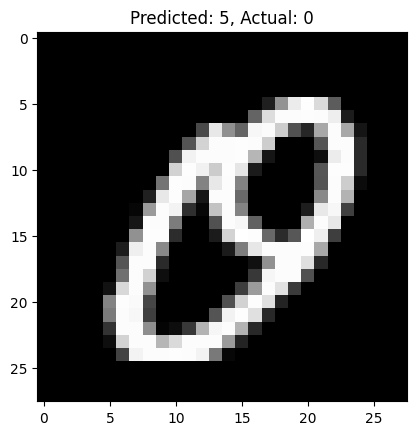

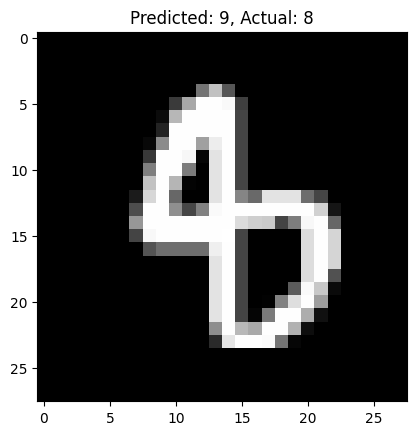

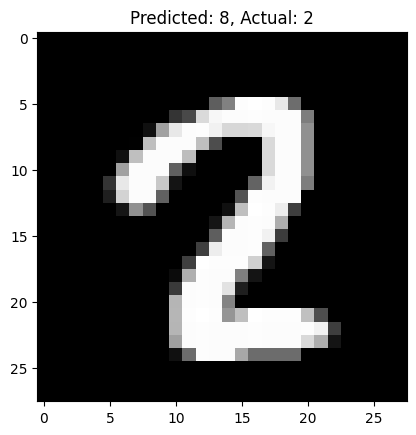

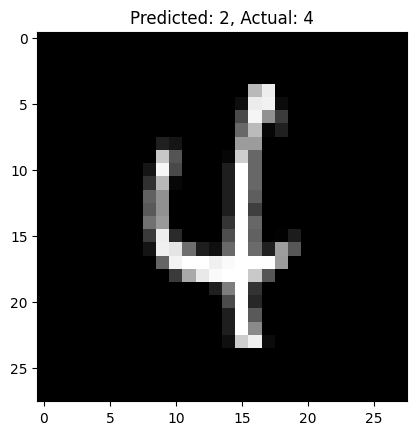

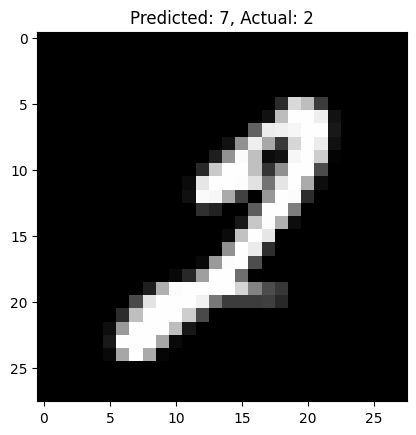

In [189]:
def testModel(W1, b1, W2, b2, val, valLabel, max_errors=5):
    predictions = make_predictions(val, W1, b1, W2, b2)  # Hent prediksjoner for hele valideringssettet
    accuracy = getAccuracy(predictions, valLabel)  # Beregn nøyaktighet
    
    correct = np.sum(predictions == valLabel)  # Antall riktige
    total = valLabel.size  # Totalt antall eksempler
    print(f"Correct predictions: {correct}/{total}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Finn feilede prediksjoner (de eksemplene der modellen tok feil)
    errors = np.where(predictions != valLabel)[0]
    
    # Vis maksimalt 5 bilder med feil prediksjon
    num_errors = min(len(errors), max_errors)
    if num_errors > 0:
        print(f"Displaying {num_errors} misclassified images:")
        for i in range(num_errors):
            index = errors[i]
            current_image = val[:, index].reshape((28, 28)) * 255  # Hent bildet og skaler tilbake til 0-255
            plt.gray()
            plt.imshow(current_image, interpolation='nearest')
            plt.title(f"Predicted: {predictions[index]}, Actual: {valLabel[index]}")
            plt.show()
    else:
        print("No misclassified images to display.")

testModel(W1, b1, W2, b2, val, valLabel, max_errors=5)